<a href="https://colab.research.google.com/github/JITHINJITH/AI-LAB/blob/master/Classification_on_Mnist_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from tensorflow import keras
mnist = keras.datasets.mnist
import matplotlib.pyplot as plt
import numpy as np

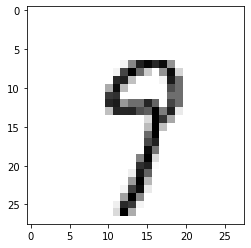

In [29]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
plt.imshow(x_train[1500],cmap = 'binary')
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [30]:
x_train = x_train.astype(dtype = np.float32)/255
x_test = x_test.astype(dtype = np.float32)/255

In [38]:
ml = keras.models.Sequential()
ml.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = x_train.shape[1:]))
ml.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
ml.add(keras.layers.MaxPool2D((2,2)))
ml.add(keras.layers.Dropout(0.25))
ml.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
ml.add(keras.layers.BatchNormalization())
ml.add(keras.layers.Flatten())
ml.add(keras.layers.Dense(units = 256,activation='relu'))
ml.add(keras.layers.Dropout(0.25))
ml.add(keras.layers.Dense(units = 10,activation='softmax'))
ml.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 128)       512       
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)            

In [40]:
ml.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
es = keras.callbacks.EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)
cp = keras.callbacks.ModelCheckpoint(filepath='/contents/mycnn.h5',monitor='val_loss',)
ml.fit(x=x_train,y = y_train,validation_split=0.1,epochs=2,batch_size=16,callbacks=[es,cp])

Epoch 1/2
3375/3375 [==============================] - 272s 80ms/step - loss: 0.1314 - accuracy: 0.9613 - val_loss: 0.0703 - val_accuracy: 0.9810
Epoch 2/2
3375/3375 [==============================] - 273s 81ms/step - loss: 0.0665 - accuracy: 0.9817 - val_loss: 0.0547 - val_accuracy: 0.9862


In [41]:
loss,acc = ml.evaluate(x_test,y_test)

313/313 [==============================] - 10s 32ms/step - loss: 0.0458 - accuracy: 0.9868


In [42]:
loss

0.04576851427555084

In [43]:
acc

0.9868000149726868